In [1]:
%load_ext autoreload
%autoreload 2

from stellar_structure_functions import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
import pandas as pd

In [2]:
### ENTER MASS AND COMPOSITON OF YOUR ZAMS STAR ###
#Give everything in log units
Mass = 1.2 #Mass of star in solar masses
composition = [0.7,0.28] #Composition in form [X,Y]

R_sun = 6.96e10 #Radius of sun cgs
L_sun = 3.826e33

#--Enter your guesses for total luminosity and radius, central pressure and temperature--#
L = 3.38 #Total Luminosity in solar luminosity
Pc = 10**17.17 #Central pressure in cgs
R = 1.14 #Total Radius in solar radius
Tc = 1.442e7 #Central temperature in cgs

guess = [Pc,R*R_sun,L*L_sun,Tc] #Put your guesses for central values of pressure and temperature, as well as total radius and luminosity

In [3]:
guess = help_guess(Mass,composition)
#guess

In [4]:
#initial = load1(guess,Mass,composition)
#final = load2(guess,Mass,composition)

In [5]:
%reload_ext autoreload

In [6]:
outwards = shootf(guess, Mass, composition, steps=100000, M_meeting_point = 0.5, M_start=1e-5,direction='outwards')

In [7]:
inwards = shootf(guess, Mass, composition, steps=100000, M_meeting_point = 0.5, M_start=1e-5,direction='inwards')

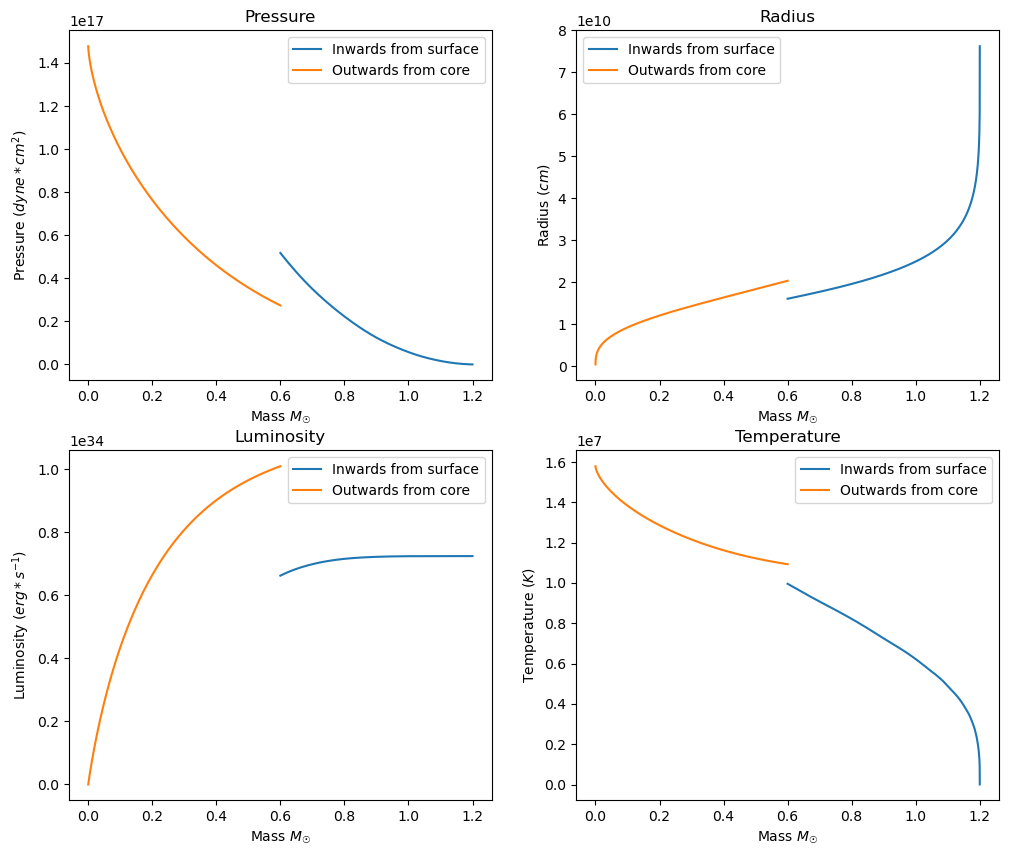

In [8]:

# Create figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Pressure
axes[0, 0].plot(inwards['Masses']/M_sun, inwards['Solution'].y[0], label='Inwards from surface')
axes[0, 0].plot(outwards['Masses']/M_sun, outwards['Solution'].y[0], label='Outwards from core')
axes[0, 0].set_xlabel(r'Mass $M_☉$')
axes[0, 0].set_ylabel(r'Pressure ($dyne*cm^2$)')
axes[0,0].set_title('Pressure')
axes[0, 0].legend()

# Temperature
axes[1, 1].plot(inwards['Masses']/M_sun, inwards['Solution'].y[3], label='Inwards from surface')
axes[1, 1].plot(outwards['Masses']/M_sun, outwards['Solution'].y[3], label='Outwards from core')
axes[1, 1].set_xlabel(r'Mass $M_☉$')
axes[1, 1].set_ylabel(r'Temperature ($K$)')
axes[1, 1].legend()
axes[1, 1].set_title('Temperature')

# Luminosity
axes[1, 0].plot(inwards['Masses']/M_sun, inwards['Solution'].y[2], label='Inwards from surface')
axes[1, 0].plot(outwards['Masses']/M_sun, outwards['Solution'].y[2], label='Outwards from core')
axes[1, 0].set_xlabel(r'Mass $M_☉$')
axes[1, 0].set_ylabel(r'Luminosity ($erg*s^{-1}$)')
axes[1, 0].legend()
axes[1, 0].set_title('Luminosity')

# Radius
axes[0, 1].plot(inwards['Masses']/M_sun, inwards['Solution'].y[1], label='Inwards from surface')
axes[0, 1].plot(outwards['Masses']/M_sun, outwards['Solution'].y[1], label='Outwards from core')
axes[0, 1].set_xlabel(r'Mass $M_☉$')
axes[0, 1].set_ylabel(r'Radius ($cm$)')
axes[0,1].set_title('Radius')
axes[0, 1].legend()

#fig.savefig('Unconverged_plot.eps',format='eps')

In [9]:
  %reload_ext autoreload
#from scipy.optimize import least_squares

In [10]:
%%time
bounds = np.array([[0.5]*4, [1.5]*4]).T
params_scale = [1,1,1,1]
it = 1
fit = minimize(resids, x0=params_scale, args=(guess,Mass,composition), bounds=bounds, method='L-BFGS-B')

/Users/mpope7/Desktop/Stellar structure/stellar_structure_functions.py:53: RuntimeWarning: invalid value encountered in log10
  log_T = np.log10(T)
/Users/mpope7/Desktop/Stellar structure/stellar_structure_functions.py:84: RuntimeWarning: invalid value encountered in scalar power
  pp_rate = 2.57e4 * g11 * psi * f11 * X**2 * rho * T9**-(2/3) * np.exp(-3.381*T9**-(1/3))
/Users/mpope7/Desktop/Stellar structure/stellar_structure_functions.py:86: RuntimeWarning: invalid value encountered in scalar power
  cno_rate = 8.24e25 * g14 * X * Z * rho * T9**-(2/3) * np.exp(-15.231*T9**-(1/3) - (T9/0.8)**2)
/Users/mpope7/Desktop/Stellar structure/stellar_structure_functions.py:53: RuntimeWarning: invalid value encountered in log10
  log_T = np.log10(T)
/Users/mpope7/Desktop/Stellar structure/stellar_structure_functions.py:58: RuntimeWarning: invalid value encountered in log10
  log_R = np.log10(R)
/Users/mpope7/Desktop/Stellar structure/stellar_structure_functions.py:77: RuntimeWarning: invalid val

CPU times: user 4min 35s, sys: 43.2 s, total: 5min 18s
Wall time: 2min 46s


In [11]:
fit

  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: 7.686138496968198e-05
        x: [ 1.024e+00  1.394e+00  1.141e+00  9.936e-01]
      nit: 65
      jac: [-1.613e-03 -1.523e-03  3.671e-04  2.121e-03]
     nfev: 705
     njev: 141
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>

In [12]:
new_guess = guess * fit.x
new_guess

array([1.51452443e+17, 1.06317322e+11, 8.26296291e+33, 1.56946456e+07])

In [13]:
outwards_final = shootf(new_guess, Mass, composition, steps=100000, M_meeting_point = 0.5, M_start=1e-5,direction='outwards')
inwards_final = shootf(new_guess, Mass, composition, steps=100000, M_meeting_point = 0.5, M_start=1e-5,direction='inwards')

In [14]:
inwards_final['Solution'].y[:, ::-1]

array([[2.27802578e+16, 2.27796828e+16, 2.27791079e+16, ...,
        3.04684644e+09, 1.43994575e+09, 1.56552462e+04],
       [1.90438182e+10, 1.90439515e+10, 1.90440848e+10, ...,
        9.77083377e+10, 9.94558295e+10, 1.06317322e+11],
       [8.11760268e+33, 8.11761057e+33, 8.11761845e+33, ...,
        8.26296291e+33, 8.26296291e+33, 8.26296291e+33],
       [8.64978900e+06, 8.64973630e+06, 8.64968361e+06, ...,
        3.10508825e+05, 2.60414096e+05, 5.65944625e+03]])

In [15]:
data = np.append(outwards_final['Solution'].y, inwards_final['Solution'].y[:, ::-1],axis=1)
data

array([[1.51318960e+17, 1.51277269e+17, 1.51239965e+17, ...,
        3.04684644e+09, 1.43994575e+09, 1.56552462e+04],
       [4.29383815e+08, 4.90976819e+08, 5.40033956e+08, ...,
        9.77083377e+10, 9.94558295e+10, 1.06317322e+11],
       [8.85486672e+29, 1.30010699e+30, 1.71442135e+30, ...,
        8.26296291e+33, 8.26296291e+33, 8.26296291e+33],
       [1.54832381e+07, 1.54815315e+07, 1.54800044e+07, ...,
        3.10508825e+05, 2.60414096e+05, 5.65944625e+03]])

In [16]:
masses = np.append(outwards_final['Masses'], inwards_final['Masses'][::-1])
masses

array([2.38680000e+28, 3.58018807e+28, 4.77357613e+28, ...,
       2.38677613e+33, 2.38678807e+33, 2.38680000e+33])

In [18]:
csv = save_table(masses,data,composition)
csv.to_csv('1.2_M_0.7_X_0.28_Y_Values.csv')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


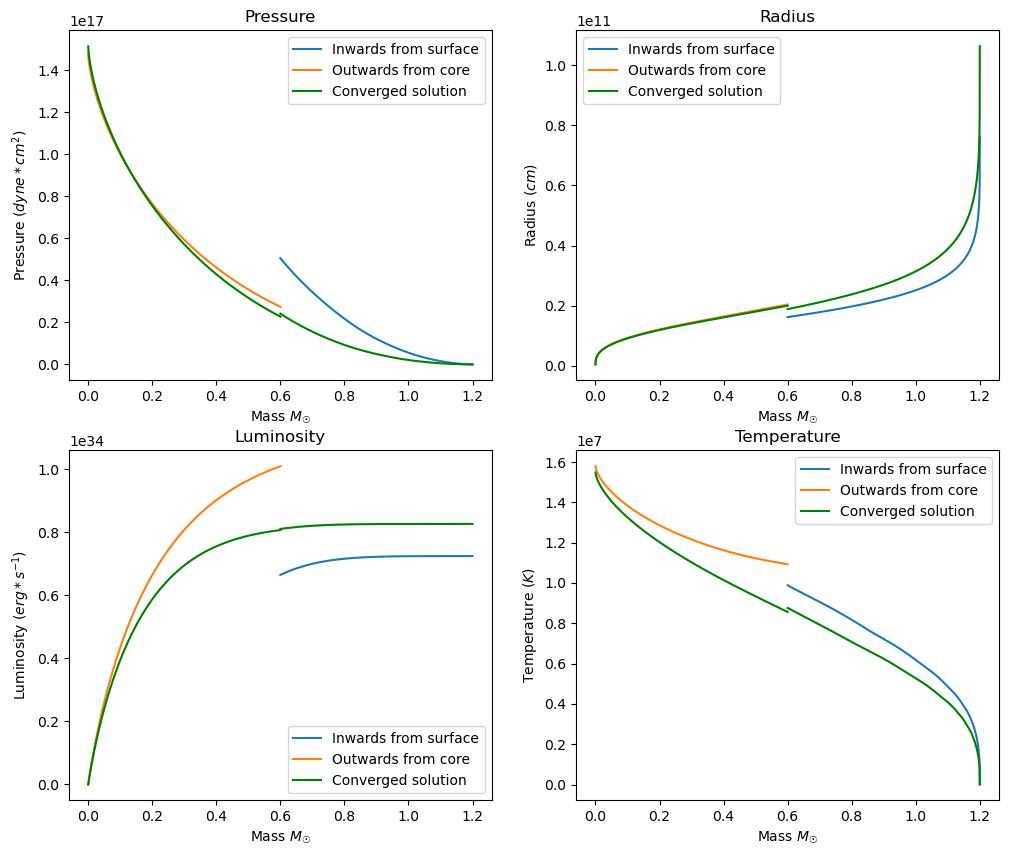

In [55]:

# Create figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Pressure
axes[0, 0].plot(inwards['Masses']/M_sun, inwards['Solution'].y[0], label='Inwards from surface')
axes[0, 0].plot(outwards['Masses']/M_sun, outwards['Solution'].y[0], label='Outwards from core')
axes[0, 0].plot(inwards_final['Masses']/M_sun, inwards_final['Solution'].y[0], label='Converged solution',color='g')
axes[0, 0].plot(outwards_final['Masses']/M_sun, outwards_final['Solution'].y[0],color='g')
axes[0, 0].set_xlabel(r'Mass $M_☉$')
axes[0, 0].set_ylabel(r'Pressure ($dyne*cm^2$)')
axes[0,0].set_title('Pressure')
axes[0, 0].legend()

# Temperature
axes[1, 1].plot(inwards['Masses']/M_sun, inwards['Solution'].y[3], label='Inwards from surface')
axes[1, 1].plot(outwards['Masses']/M_sun, outwards['Solution'].y[3], label='Outwards from core')
axes[1, 1].plot(inwards_final['Masses']/M_sun, inwards_final['Solution'].y[3], label='Converged solution',color='g')
axes[1, 1].plot(outwards_final['Masses']/M_sun, outwards_final['Solution'].y[3],color='g')
axes[1, 1].set_xlabel(r'Mass $M_☉$')
axes[1, 1].set_ylabel(r'Temperature ($K$)')
axes[1, 1].legend()
axes[1, 1].set_title('Temperature')

# Luminosity
axes[1, 0].plot(inwards['Masses']/M_sun, inwards['Solution'].y[2], label='Inwards from surface')
axes[1, 0].plot(outwards['Masses']/M_sun, outwards['Solution'].y[2], label='Outwards from core')
axes[1, 0].plot(inwards_final['Masses']/M_sun, inwards_final['Solution'].y[2], label='Converged solution',color='g')
axes[1, 0].plot(outwards_final['Masses']/M_sun, outwards_final['Solution'].y[2],color='g')
axes[1, 0].set_xlabel(r'Mass $M_☉$')
axes[1, 0].set_ylabel(r'Luminosity ($erg*s^{-1}$)')
axes[1, 0].legend()
axes[1, 0].set_title('Luminosity')

# Radius
axes[0, 1].plot(inwards['Masses']/M_sun, inwards['Solution'].y[1], label='Inwards from surface')
axes[0, 1].plot(outwards['Masses']/M_sun, outwards['Solution'].y[1], label='Outwards from core')
axes[0, 1].plot(inwards_final['Masses']/M_sun, inwards_final['Solution'].y[1], label='Converged solution',color='g')
axes[0, 1].plot(outwards_final['Masses']/M_sun, outwards_final['Solution'].y[1],color='g')
axes[0, 1].set_xlabel(r'Mass $M_☉$')
axes[0, 1].set_ylabel(r'Radius ($cm$)')
axes[0,1].set_title('Radius')
axes[0, 1].legend()
fig.savefig('Converged_plot.eps',format='eps')

In [56]:
outwards_final['Masses'][1]/M_sun

1.7999939999399992e-05

In [57]:
import os
import mesa_reader as mr

# if the directory plt_out/ does not exits, make it
if not os.path.exists("plt_out"):
    os.makedirs("plt_out")

# enable Latex for figure labels
plt.rcParams["text.usetex"] = False

# read in the history data from MESA
history = mr.MesaData("/Users/mpope7/mesa-24.08.1/tutorial/LOGS/history.data")

# load the last profile saved (largest model number)
load_dir = mr.MesaLogDir("/Users/mpope7/mesa-24.08.1/tutorial/LOGS")
profile = load_dir.profile_data()

sigma_sb = 5.67051e-5 #stefan boltzmann constant
energy = profile.pp + profile.cno
energy_order = energy[::-1]
mass_order = profile.mass[::-1]
dm = np.diff(mass_order)
energy_mid = (energy_order[:-1] + energy_order[1:])/2
dl = energy_mid * dm
lum_mesa = np.cumsum(dl)
#print(lum_mesa)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


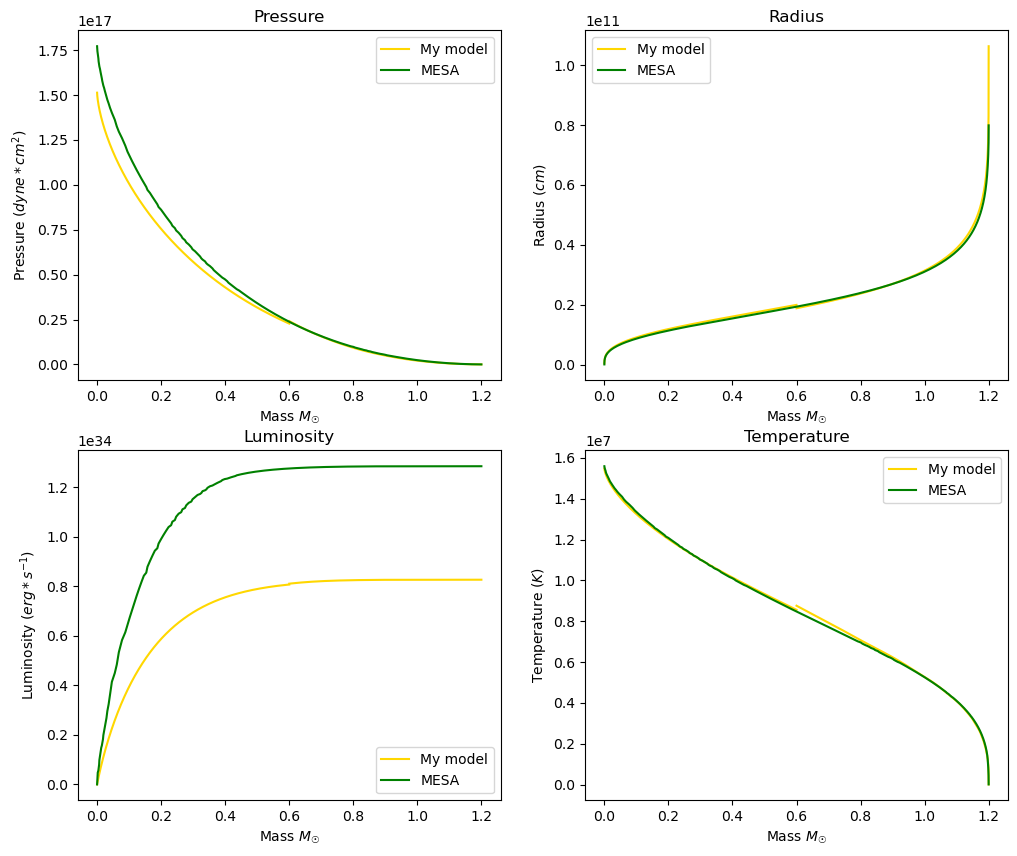

In [58]:
# Create figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Pressure
axes[0, 0].plot(inwards_final['Masses']/M_sun, inwards_final['Solution'].y[0], color='gold',label='My model')
axes[0, 0].plot(outwards_final['Masses']/M_sun, outwards_final['Solution'].y[0], color='gold')
axes[0, 0].plot(profile.mass, 10**profile.logP,label='MESA', color='g')
axes[0, 0].set_xlabel(r'Mass $M_☉$')
axes[0, 0].set_ylabel(r'Pressure ($dyne*cm^2$)')
axes[0, 0].set_title('Pressure')
axes[0, 0].legend()

# Temperature
axes[1, 1].plot(inwards_final['Masses']/M_sun, inwards_final['Solution'].y[3], color='gold',label='My model')
axes[1, 1].plot(outwards_final['Masses']/M_sun, outwards_final['Solution'].y[3], color='gold')
axes[1, 1].plot(profile.mass, 10**profile.logT,label='MESA', color='g')
axes[1, 1].set_xlabel(r'Mass $M_☉$')
axes[1, 1].set_ylabel(r'Temperature ($K$)')
axes[1, 1].legend()
axes[1, 1].set_title('Temperature')

# Luminosity
axes[1, 0].plot(inwards_final['Masses']/M_sun, inwards_final['Solution'].y[2], color='gold',label='My model')
axes[1, 0].plot(outwards_final['Masses']/M_sun, outwards_final['Solution'].y[2], color='gold')
axes[1, 0].plot((profile.mass[1:]), np.flip(lum_mesa*L_sun),label='MESA', color='g')
axes[1, 0].set_xlabel(r'Mass $M_☉$')
axes[1, 0].set_ylabel(r'Luminosity ($erg*s^{-1}$)')
axes[1, 0].legend()
axes[1, 0].set_title('Luminosity')

# Radius
axes[0, 1].plot(inwards_final['Masses']/M_sun, inwards_final['Solution'].y[1], color='gold',label='My model')
axes[0, 1].plot(outwards_final['Masses']/M_sun, outwards_final['Solution'].y[1], color='gold')
axes[0, 1].plot(profile.mass, 10**profile.logR * R_sun,label='MESA', color='g')
axes[0, 1].set_xlabel(r'Mass $M_☉$')
axes[0, 1].set_ylabel(r'Radius ($cm$)')
axes[0, 1].set_title('Radius')
axes[0, 1].legend()
fig.savefig('MESA_comparison_plot.eps',format='eps')

In [59]:
100*(outwards_final['Solution'].y[0][0]-10**profile.logP[0])/(10**profile.logP[0])

377944624302371.1

In [60]:
print(f"Final luminosity: {inwards_final['Solution'].y[2][0]:.3e}")
print(f"Final radius: {inwards_final['Solution'].y[1][0]:.3e}")
print(f"Final temperature (Teff): {inwards_final['Solution'].y[3][0]:.3f}")
print(f"Final logg: {np.log10(G*(Mass*M_sun)/(inwards_final['Solution'].y[1][0])**2):.3f}")

Final luminosity: 8.263e+33
Final radius: 1.063e+11
Final temperature (Teff): 5659.446
Final logg: 4.149


In [61]:
print(f"MESA luminosity: {L_sun*lum_mesa[-1]:.3e}")
print(f"MESA radius: {profile.R[0]*R_sun:.3e}")
print(f"MESA Teff: {profile.Teff:.3f}")
print(f"MESA logg: {np.log10(G*Mass*M_sun/(profile.R[0]*R_sun)**2):.3f}")

MESA luminosity: 1.284e+34
MESA radius: 7.990e+10
MESA Teff: 6169.602
MESA logg: 4.397


In [62]:
print(f"Luminosity difference: {100*get_difference(L_sun*lum_mesa[-1],inwards_final['Solution'].y[2][0]):.3}")
print(f"Radius difference: {100*get_difference(profile.R[0]*R_sun,inwards_final['Solution'].y[1][0]):.3}")
print(f"Teff difference: {100*get_difference(profile.Teff,inwards_final['Solution'].y[3][0]):.3}")
print(f"Logg difference: {100*get_difference((G*Mass*M_sun/(profile.R[0]*R_sun)**2),(G*(Mass*M_sun)/(inwards_final['Solution'].y[1][0])**2)):.3}")

Luminosity difference: 35.7
Radius difference: 33.1
Teff difference: 8.27
Logg difference: 43.5
